# MACHINE LEARNING

# 1.2. Practical Task: Learning as a Search

## Importing Necessary Libraries

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin
from numpy import pi
from mpl_toolkits import mplot3d 
from numpy.random import rand, randint
from pylab import *

#### 1.1. Build a plot of the function (Octave, Matlab, Python are good choices) and tentatively define the possible area of global minima of the function. Make a hypothesis about the existing of local and global optimal solutions.

<ipython-input-5-d30931a44576>:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


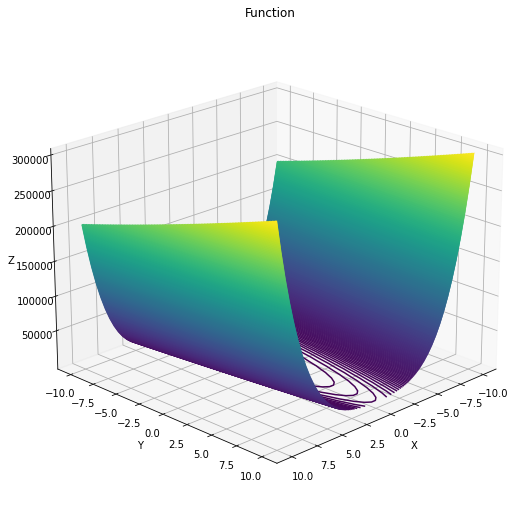

In [5]:
def fitness_func(x,y): 
    z = 25 * (y + x**2)**2 + (1 + x)**2
    return z


x = np.linspace(-10,10)
y = np.linspace(-10,10)


x,y = np.meshgrid(x,y)
F = fitness_func(x,y)


fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection = '3d')
ax.contour3D(x,y,F,450)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Function')
ax.view_init(21,45)


plt.show()

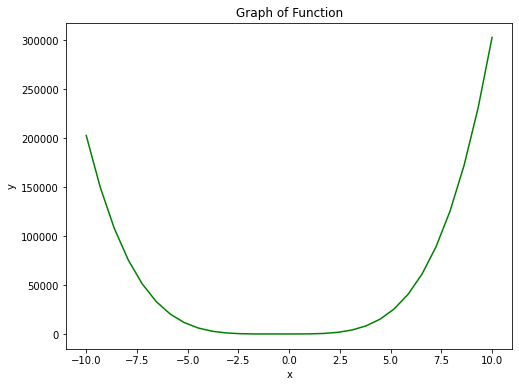

In [6]:
x = np.linspace(start = -10, stop = 10, num = 30)
y = np.linspace(start = -10, stop = 10, num = 30)
y = 25 * (y + x**2)**2 + (1 + x)**2

plt.figure(figsize=(8,6))
plt.plot(x,y,color='green')
plt.title('Graph of Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Local Minima

<ipython-input-89-a15cf5e57c4f>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  show()


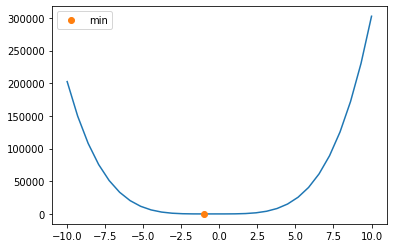

In [89]:
x = linspace(-10,10,30)
y = linspace(-10,10,30)
data = 25 * (y + x**2)**2 + (1 + x)**2

# the line
a = diff(sign(diff(data))).nonzero()[0] + 1 
b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1
c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 


# Graph
plot(x,data)
plot(x[b], data[b], "o", label="min")
legend()
show()

#### 1.2. Implement a simple Genetic Algorithm (GA), which will minimize the fitness function and can deal with the real-values features. Crossover/Mutation operations and initial seed are up to you. Try to use GA with the following parameters:
- size of population in each generation: 4, 10
- crossover operations per generation: 25%, 50% , 75%
- mutations per generation: 1%, 5% and 50% (or at least 1 element in the generation)
- total number of generations: 10, 100 or 1000
- selection of candidates with the best values of fitness function is performed after
  crossover/mutation

### Genetic Algorithm (GA)

Min objective function value: -0.9999765848056736
Optimal solution [-6.453399658203125, -0.3292655944824219]


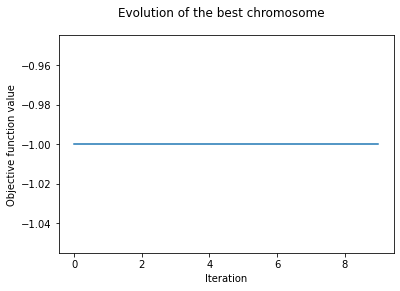

In [7]:

def objective_function(I):
    x = I[0]
    y = I[1]
    Objective_min = 25 * (y + x**2)**2 + (1 + x)**2
    
    return Objective_min



# Parameters of the genetic algorithm
bounds = [[-10, 10], [-10, 10]]


# Following are the different parameters than can be changed accordingly
iteration = 10
#iteration = 100
#iteration = 1000
bits = 20

population_size = 4
#pop_size = 10

crossover_rate = 0.25
#crossover_rate = 0.50
#crossover_rate = 0.75

mutation_rate = 0.01
#mutation_rate = 0.05
#mutation_rate = 0.50



def crossover(population, crossover_rate):
    offspring = list()
    for i in range(int(len(population)/2)):
        parent1 = population[2*i-1].copy()
        parent2 = population[2*i-1].copy()
        if rand() < crossover_rate:
            cp = randint(1, len(parent1)-1,size=2)
            while cp[0]== cp[1]:
                cp = randint(1, len(parent1)-1, size=2)
                
                
            cp = sorted(cp)
            c1 = parent1[:cp[0]] + parent2[cp[0]:cp[1]] + parent1[cp[1]:]
            c2 = parent2[:cp[0]] + parent1[cp[0]:cp[1]] + parent2[cp[1]:]
            offspring.append(c1)
            offspring.append(c2)
        else:
            offspring.append(parent1)
            offspring.append(parent2)
    
    return offspring


def mutation(population, mutation_rate):
    offspring = list()
    for i in range(int(len(population))):
        parent1 = population[i].copy()
        if rand() < mutation_rate:
            cp = randint(0, len(parent1))
            c1 = parent1
            if c1[cp]==1:
                c1[cp]=0
            else: 
                c1[cp]=1
                
            offspring.append(c1)
        else:
            offspring.append(parent1)
            
            
    return offspring



# roulette wheel selection
def selection(population, fitness, population_size):
    next_generation = list()
    elite = np.argmax(fitness)
    next_generation.append(population[elite])
    P = [f/sum(fitness) for f in fitness]
    index = list(range(int(len(population))))
    index_selected = np.random.choice(index, size= population_size-1, replace=False, p=P)
    s = 0 
    for j in range(population_size-1):
        next_generation.append(population[index_selected[s]])
        s += 1
        
        
    return next_generation



def decoding(bounds, bits, chromosome):
    real_chromosome = list()
    for i in range(len(bounds)):
        st, en = i * bits, (i*bits)+bits
        sub = chromosome[st:en]
        characters = ''.join([str(s) for s in sub])
        integer = int(characters, 2)
        real_value = bounds[i][0] + (integer/(2**bits)) * (bounds[i][1] - bounds[i][0])
        real_chromosome.append(real_value)
        
    return real_chromosome



# initial population
population = [randint(0,2, bits*len(bounds)).tolist() for _ in range(population_size)]



# main program
best_fitness = []
for gen in range(iteration):
    offspring = crossover(population, crossover_rate)
    offspring = mutation(offspring, mutation_rate)
    
    
    for s in offspring:
        population.append(s)
        
    real_chromosome = [decoding(bounds, bits, p) for p in population]
    fitness = [objective_function(d) for d in real_chromosome]
    
    
    index = np.argmax(fitness)
    current_best = population[index]
    best_fitness.append(1/max(fitness)-1)
    population = selection(population,fitness,population_size)
    
    
    
fig = plt.figure()
plt.plot(best_fitness)
fig.suptitle('Evolution of the best chromosome')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
print('Min objective function value:', min(best_fitness))
print('Optimal solution',decoding(bounds, bits, current_best))



#### 1.3. Implement a simple Gradient Descent method. If you like, you may use an online tool or library that calculates the partial derivatives for you. Try using the following parameters:
- Employ several stop conditions: absolute differences between the function values, absolute differences between     the arguments values and absolute differences between the first order derivative values on adjacent steps.
- learning steps: 1e-6, 0.1, 1.
- maximal number of iterations: 100, 1000

### Gradient Descent

In [8]:

def Gradient_Descent(x,y):
    m_current = b_current = 0
    
    
# Following parameters are subject to change
    #iterations = 100
    iterations = 1000
    
    n = len(x)
    
    learning_rate = 1e-6
    #learning_rate = 0.1
    #learning_rate = 1
    
    
    
    for i in range(iterations):
        y_predicted = m_current * x + b_current
        cost = (1/n) * sum( [val**2 for val in (y-y_predicted)])
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_current = m_current - learning_rate * md
        b_current = b_current - learning_rate * bd
        
        
        print('m {}, b {}, cost {} iteration {}'.format(m_current,b_current,cost,i))

        

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
Gradient_Descent(x,y)

m 6.2e-05, b 1.8e-05, cost 89.0 iteration 0
m 0.000123998528, b 3.5999592e-05, cost 88.995832049304 iteration 1
m 0.00018599558403483202, b 5.3998776009648e-05, cost 88.99166429581935 iteration 2
m 0.0002479911681393272, b 7.199755203859177e-05, cost 88.98749673953667 iteration 3
m 0.0003099852803483159, b 8.999592009647886e-05, cost 88.98332938044668 iteration 4
m 0.00037197792069662767, b 0.00010799388019295657, cost 88.97916221854001 iteration 5
m 0.0004339690892190912, b 0.000125991432337672, cost 88.97499525380736 iteration 6
m 0.0004959587859505344, b 0.00014398857654027202, cost 88.97082848623937 iteration 7
m 0.0005579470109257842, b 0.00016198531281040325, cost 88.96666191582675 iteration 8
m 0.000619933764179667, b 0.00017998164115771206, cost 88.96249554256013 iteration 9
m 0.0006819190457470081, b 0.00019797756159184467, cost 88.95832936643018 iteration 10
m 0.0007439028556626321, b 0.000215973074122447, cost 88.9541633874276 iteration 11
m 0.0008058851939613627, b 0.000233

#### 1.4. Compare the obtained results for finding global or local minima. From the program output, estimate which set of Genetic Algorithm parameters gives the fastest convergence to fitness function minimum and why? How many generations did it require? For gradient descent, which stop conditions, learning steps, and maximum number of iterations produced the fastest or most accurate results? Why do you think these parameters produced the best results, and were there any settings which produced incorrect results (and why did the produce incorrect results)? Present the output of the program in report and describe the obtained results.

Answer for this question is provided in the report.

# 1.3. Practical Task: Support Vector Machine

#### 1. Find an implementation of the SVM model that offers a capability to adjust key parameters of the model. Find a classification dataset on Kaggle or UCI.
#### 2. Train the model using your dataset, and try several values of the penalty parameter C (0.1, 1, 100).
#### 3. Analyze the accuracy and robustness of the algorithm and and propose methods to improve them.
#### 4. What kind of data will cause the general (standard) SVM classifier to fail, and how can this problem be mitigated? Does it work well for your dataset?
#### 5. Try to use different kernel functions and see how this influences the accuracy on cross- validation. Explain why.

### Support Vector Machine

## Importing Necessary Libraries

In [9]:
import pandas_profiling
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut

In [10]:
# Importing the dataset

dataset = pd.read_csv("Breast_cancer_data.csv")

<IPython.core.display.Javascript object>

In [11]:
dataset.shape

(569, 6)

In [12]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [14]:
dataset.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [15]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [16]:
X = dataset.iloc[:,:-1].values
X.shape

(569, 5)

In [17]:
Y = dataset['diagnosis'].values
Y.shape

(569,)

In [18]:
dataset.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000

### Visualization of the dataset
- Normal cells: Benign = 1
- Tumor: Mialignant = 0

In [19]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<IPython.core.display.Javascript object>

/Users/masoomajafari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

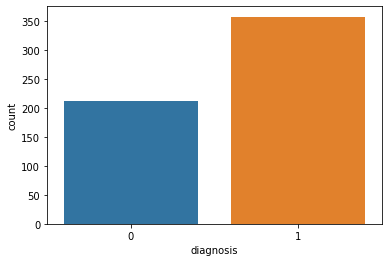

In [20]:
sns.countplot(dataset['diagnosis'])

<IPython.core.display.Javascript object>

<AxesSubplot:>

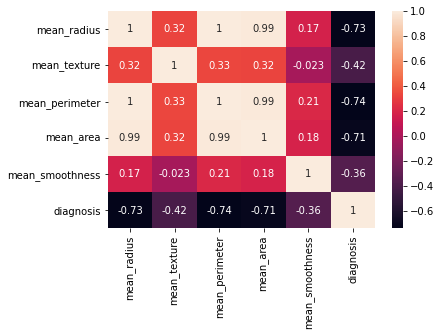

In [21]:
sns.heatmap(dataset.corr(), annot=True)

<IPython.core.display.Javascript object>

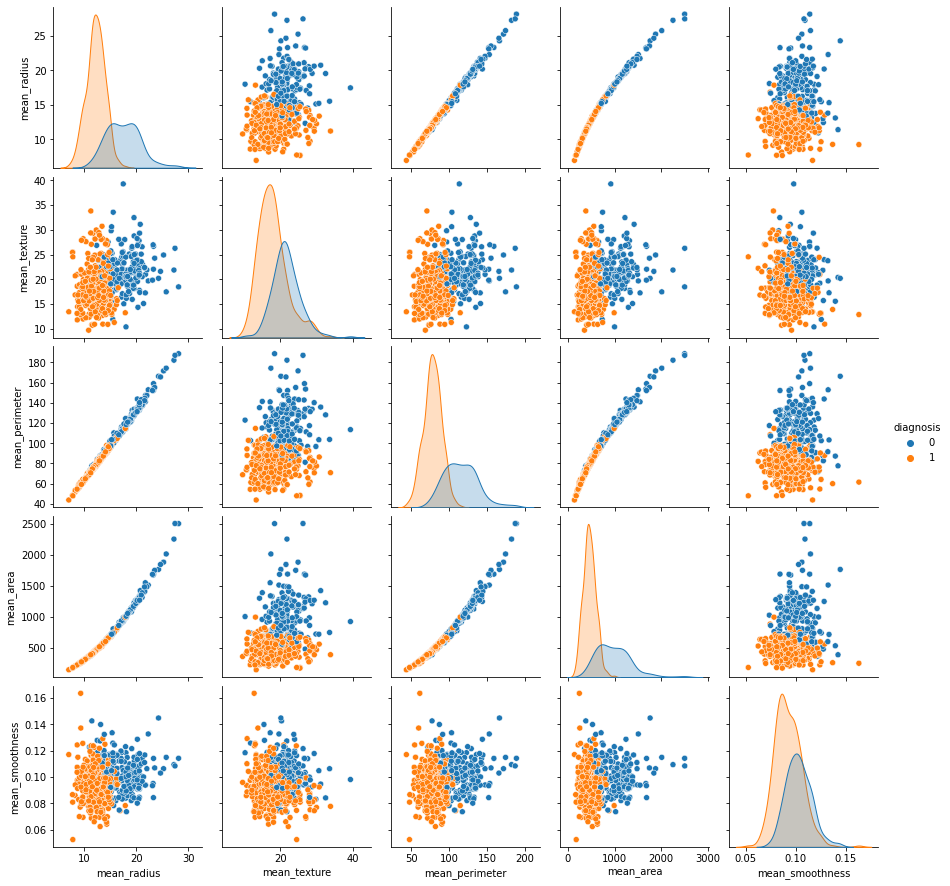

In [22]:
sns.pairplot(dataset, hue='diagnosis')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mean_area', ylabel='mean_smoothness'>

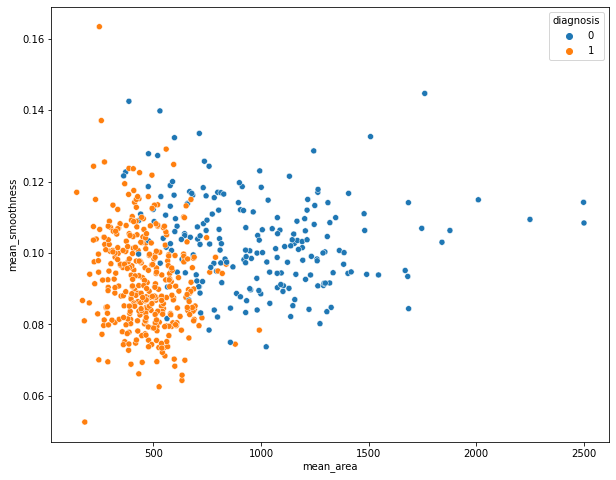

In [23]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x = 'mean_area', y = 'mean_smoothness', hue = 'diagnosis', data=dataset)

In [24]:
# generate report with panda-profiling
description = dataset.profile_report(title='Cancer Recognition Report')
description

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# Feature Extraction

X = dataset.drop(['diagnosis'], axis = 1)
X.head()

y = dataset['diagnosis']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [26]:
# Splitting the dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)


In [27]:
print(X_train.shape)

(426, 5)


In [28]:
print(y_train.shape)

(426,)


In [29]:
print(X_test.shape)

(143, 5)


In [30]:
print(y_test.shape)

(143,)


In [31]:
# Features Normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [32]:
# First 5 rows
X_train[:5, :]

array([[-0.65079907, -0.43057322, -0.68024847, -0.62698309, -0.91381897],
       [-0.82835341,  0.15226547, -0.82773762, -0.75309358,  0.65281216],
       [ 1.68277234,  2.18977235,  1.60009756,  1.67383892,  0.10362413],
       [-0.16041087, -0.33829042, -0.24187796, -0.23920722, -1.22020808],
       [ 0.71326925,  0.23483428,  0.61273968,  0.55328888, -1.54610782]])

In [33]:
# Kernels of Support Vector Machine
# SVM Kernels
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))
    

linear
0.9366197183098591
poly
0.8826291079812206
rbf
0.9460093896713615
sigmoid
0.8826291079812206


In [34]:
# Using the best kernel
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [35]:
# Looking at the Test Set
X_test

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
512        13.40         20.52           88.64      556.7          0.11060
457        13.21         25.25           84.10      537.9          0.08791
439        14.02         15.66           89.59      606.5          0.07966
298        14.26         18.17           91.22      633.1          0.06576
37         13.03         18.42           82.61      523.8          0.08983
..           ...           ...             ...        ...              ...
236        23.21         26.97          153.50     1670.0          0.09509
113        10.51         20.19           68.64      334.2          0.11220
527        12.34         12.27           78.94      468.5          0.09003
76         13.53         10.94           87.91      559.2          0.12910
162        19.59         18.15          130.70     1214.0          0.11200

[143 rows x 5 columns]

In [36]:
# Third row in the test set
X_test.iloc[2]

mean_radius         14.02000
mean_texture        15.66000
mean_perimeter      89.59000
mean_area          606.50000
mean_smoothness      0.07966
Name: 439, dtype: float64

In [39]:
# Convert dataframe to a numpy array
t_record = np.array([ X_test.iloc[2]])

In [40]:
# Predicting on third record in Test Set
t_record = scaler.transform(t_record)

print("Model's Prediction:", model.predict(t_record))
print("Actual Prediction:", y_test.iloc[2])

Model's Prediction: [1]
Actual Prediction: 1


/Users/masoomajafari/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
# Accuracy on Testing Set
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9090909090909091


In [42]:
# Comparison to Null Prediction
y_zero = np.zeros(y_test.shape)
print(accuracy_score(y_test, y_zero))

0.3706293706293706


In [43]:
# precision, recall and f1 score
from sklearn.metrics import recall_score, precision_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision is", precision)
print("Recall is", recall)
print("F1 score is", f1)

Precision is 0.9325842696629213
Recall is 0.9222222222222223
F1 score is 0.9273743016759777


In [44]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.93      0.92      0.93        90

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



## Kernel : Linear

# C = 0.1

In [45]:
model = svm.SVC(kernel='linear', C = 0.1)

In [46]:
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [47]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9300699300699301


In [48]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[47,  6],
       [ 4, 86]])

# C = 1.0

In [49]:
model1 = svm.SVC(kernel='linear', C = 1.0)

In [50]:
model1.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = model1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9230769230769231


In [52]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[47,  6],
       [ 5, 85]])

# C = 100

In [53]:
model100 = svm.SVC(kernel='linear', C = 100)

In [54]:
model100.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [55]:
y_pred = model100.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9230769230769231


In [56]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[48,  5],
       [ 6, 84]])

# Summary

In [57]:
# Summary
for this_C in [0.1,1,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest  = clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:0.1, training score :0.927230 , Test Score: 0.930070 

Linear SVM value of C:1, training score :0.936620 , Test Score: 0.923077 

Linear SVM value of C:100, training score :0.948357 , Test Score: 0.923077 



In [58]:
clf1 = SVC(kernel='linear',C=0.1).fit(X_train,y_train)
scores = cross_val_score(clf1,X_train,y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))


print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))

The Cross Validation Score :[0.93023256 0.89411765 0.89411765 0.92941176 0.95294118]
The Average Cross Validation Score :0.9201641586867305
The Stratified Cross Validation Score :[0.94186047 0.92941176 0.94117647 0.95294118 0.88235294]
The Average Stratified Cross Validation Score :0.9295485636114911


## Kernel : Polynomial
# C = 0.1

In [59]:
model = svm.SVC(kernel='poly', C = 0.1)

In [60]:
model.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [61]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8391608391608392


In [62]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[31, 22],
       [ 1, 89]])

# C = 1.0

In [63]:
model1 = svm.SVC(kernel='poly', C = 1.0)

In [64]:
model1.fit(X_train, y_train)

SVC(kernel='poly')

In [65]:
y_pred = model1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9090909090909091


In [66]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[40, 13],
       [ 0, 90]])

# C = 100

In [67]:
model100 = svm.SVC(kernel='poly', C = 100)

In [68]:
model100.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [69]:
y_pred = model100.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9370629370629371


In [70]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[47,  6],
       [ 3, 87]])

## Kernel: Radial
# C = 0.1

In [71]:
model = svm.SVC(kernel='rbf', C = 0.1)

In [72]:
model.fit(X_train, y_train)

SVC(C=0.1)

In [73]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9300699300699301


In [74]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[46,  7],
       [ 3, 87]])

# C = 1.0

In [75]:
model1 = svm.SVC(kernel='rbf', C = 1.0)

In [76]:
model1.fit(X_train, y_train)

SVC()

In [77]:
y_pred = model1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9090909090909091


In [78]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[47,  6],
       [ 7, 83]])

# C = 100

In [79]:
model100 = svm.SVC(kernel='rbf', C = 100)

In [80]:
model100.fit(X_train, y_train)

SVC(C=100)

In [81]:
y_pred = model100.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8951048951048951


In [82]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[44,  9],
       [ 6, 84]])

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8951048951048951


<IPython.core.display.Javascript object>

<ipython-input-87-4828edff6b58>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


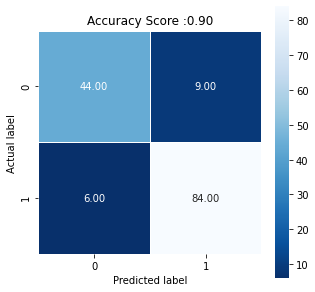

In [87]:
plt.figure(figsize=(5,5))

sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

A=f'Accuracy Score :{accuracy:.2f}'

plt.title(A)

plt.show()